

# Costumer  Segmentation with K-Means and Silhoutte

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#open file

dataset = pd.read_excel('../dataset/segmentasi_data.xlsx')
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,Single,67,University,124670,Official employee,Big City
1,100000002,Male,Maried,22,Highschool,150773,Official employee,Big City
2,100000003,Female,Single,49,Highschool,89210,Unemployed,Small City
3,100000004,Female,Single,45,Highschool,171565,Official employee,Mid City
4,100000005,Female,Single,53,Highschool,149031,Official employee,Mid City


## Data Prosessing 

In [47]:
# Columns in Dataset

dataset.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [48]:
dataset.dtypes

ID                  int64
Sex                object
Marital status     object
Age                 int64
Education          object
Income              int64
Occupation         object
Settlement size    object
dtype: object

Terdapat dua tipe data diatas

Untuk dapat melihat analisa statistik atau summary pada suatu dataset program tidak dapat mengeksekusi field data yang berupa kategorikal sehingga pada kolom object dirubah menjadi numerik.

In [9]:
# Change variable object to numeric

dataset.replace(('Male','Female'), (1,0), inplace=True)
dataset.replace(('Single','Maried'), (0,1), inplace=True)
dataset.replace(('Unknown','Highschool', 'University', 'Graduated'), (0,1,2,3), inplace=True)
dataset.replace(('Unemployed','Official employee', 'Highly qualified'), (0,1,2), inplace=True)
dataset.replace(('Small City','Mid City', 'Big City'), (0,1,2), inplace=True)

In [10]:
dataset.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

Variabel data semua sudah bukan object

In [11]:
dataset.head(15)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [12]:
# Statistic Descriptif dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,1.000003e+08,144.481833,100000001.0,1.000001e+08,100000250.5,1.000004e+08,100000500.0
Sex,500.0,3.040000e-01,0.460443,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,500.0,4.500000e-01,0.497992,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,500.0,3.552800e+01,11.471198,19.0,2.700000e+01,33.0,4.125000e+01,75.0
Education,500.0,9.360000e-01,0.603849,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,500.0,1.290344e+05,39631.566495,43684.0,1.046160e+05,122216.0,1.481038e+05,309364.0
Occupation,500.0,9.500000e-01,0.613394,0.0,1.000000e+00,1.0,1.000000e+00,2.0
Settlement size,500.0,9.440000e-01,0.825971,0.0,0.000000e+00,1.0,2.000000e+00,2.0


Dari summary dataset diatas..

Dapat diliat pada variabel Age diketahui score max = 75, min = 19, dan rata" = 33

### Cek Duplikat Data 

In [53]:
# Check data duplication

data=dataset.duplicated(subset=None, keep=False)
data

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

jika output bernilai False maka tidak ada data duplikat

In [13]:
dataset.to_excel("newdata.xlsx", index=False)
newdata = pd.read_excel('newdata.xlsx')
newdata.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [55]:
# Check Missing Value 

newdata.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Dari summary tersebut tidak ditemukan missing value

## Segmentasi 

In [56]:
print("Mean of Income of Female:",newdata['Income'].loc[newdata['Sex'] == 0 ].mean())
print("Mean of Income of Male:",newdata['Income'].loc[newdata['Sex'] == 1 ].mean())

Mean of Income of Female: 128912.75862068965
Mean of Income of Male: 129312.78289473684


Pendapatan rata" berdasarkan Sex 

In [57]:
print("Mean of Income of Graduated:",newdata['Income'].loc[newdata['Education'] == 3 ].mean())
print("Mean of Income of University:",newdata['Income'].loc[newdata['Education'] == 2 ].mean())
print("Mean of Income of Highschool:",newdata['Income'].loc[newdata['Education'] == 1 ].mean())

Mean of Income of Graduated: 172803.0
Mean of Income of University: 144689.92857142858
Mean of Income of Highschool: 126223.69565217392


Pendapatan rata" berdasarkan Education

In [58]:
print("Mean of Income of Highly qualified:",newdata['Income'].loc[newdata['Occupation'] == 2 ].mean())
print("Mean of Income of Official employee:",newdata['Income'].loc[newdata['Occupation'] == 1 ].mean())
print("Mean of Income of Unemployed:",newdata['Income'].loc[newdata['Occupation'] == 0 ].mean())

Mean of Income of Highly qualified: 181195.9024390244
Mean of Income of Official employee: 126932.95819935692
Mean of Income of Unemployed: 95167.93457943926


Pendapatan rata" berdasarkan Occupation

In [5]:
# Ratio Male vs Female

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Sex"
grouped = newdata[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
colors = ['gold', 'mediumturquoise']
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Gender(Male, Female)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [6]:
# Age Count 

x=newdata
col='Age'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="0", marker=dict(color="#EA2027"))
y = [trace1]
layout={'title':"Age count ",'xaxis':{'title':"Age"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [7]:
# Income Count

col='Education'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="0", marker=dict(color="#0a3d62"))
y = [trace1]
layout={'title':"Education count ",'xaxis':{'title':"Education"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [8]:
col='Occupation'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="0", marker=dict(color="#1B9CFC"))
y = [trace1]
layout={'title':"Occupation count ",'xaxis':{'title':"Occupation"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)

## Clustering with K-Means 

In [16]:
z=newdata[['Age','Income']]
z.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_std = scaler.fit_transform(z)

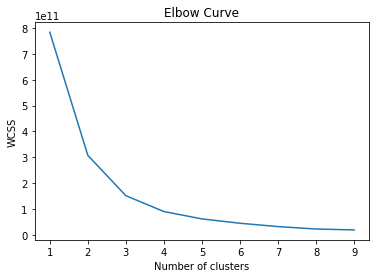

In [18]:
dummy = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset)
    dummy.append(kmeans.inertia_)
    
#Elbow Curve
plt.plot(range(1, 10), dummy)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Membaca Elbow Curve 

Perhatikan pada garis distorsi, bagian garis yang membelok sehingga terlihat seperi siku lengan itulah yang disebut ELbow.
Pada gambar tersebut diatas, Elbow terlihat samar pada K=3, K=4).
Dengan demikian, jumlah k=3 dan k=4 bisa digunakan sebagai inisial K pada clustering K-Means.
atau pilih nilai k yang paling besar, yaitu k=4

In [19]:
# Use 4 Cluster

kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(dataset_std)

KMeans(n_clusters=4, random_state=0)

In [20]:
# Prediction Cluster 

prediction=kmeans.fit_predict(dataset_std)
prediction

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 3, 0, 1, 1,
       1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 2, 1, 1, 3, 2, 1,
       2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 3,
       0, 2, 1, 1, 2, 2, 1, 3, 1, 0, 2, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3,
       3, 2, 1, 1, 0, 2, 0, 2, 0, 3, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 0, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       2, 2, 0, 2, 3, 2, 2, 0, 3, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 3, 1, 1, 2, 3, 3, 1, 3, 0, 2, 1, 1, 0, 1,

In [21]:
# Result Of CLustering

data=newdata.copy()
data['cluster']=prediction
data.groupby(by = 'cluster').mean()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,,
0,1.000002e+08,0.312500,0.465278,31.583333,0.770833,151210.722222,1.263889,1.166667
1,1.000002e+08,0.204082,0.295918,52.438776,1.479592,125310.244898,0.755102,0.775510
2,1.000003e+08,0.349776,0.524664,29.219731,0.757848,100997.641256,0.704036,0.780269
3,1.000003e+08,0.257143,0.342857,44.600000,1.228571,226856.028571,1.771429,1.542857


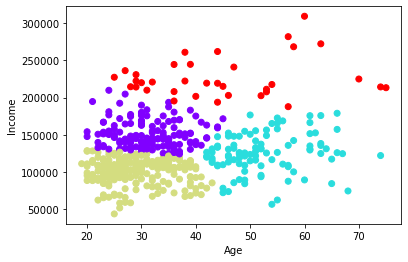

In [22]:
# Visualisation Result Of Clustering

plt.scatter(data['Age'],data["Income"],c=data['cluster'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#### Hasil Clustering dapat dijadikan 4 kategori 

In [37]:
print("Income People on Cluster")
print("Amount Income People Cluster 0:",round(data['Income'].loc[data['cluster'] == 0 ].mean()))
print("Amount Income People Cluster 1:",round(data['Income'].loc[data['cluster'] == 1 ].mean()))
print("Amount Income People Cluster 2:",round(data['Income'].loc[data['cluster'] == 2 ].mean()))
print("Amount Income People Cluster 3:",round(data['Income'].loc[data['cluster'] == 3 ].mean()))
print("\n")
print("Total People on Cluster")
print("Total People Cluster 0:",data['Income'].loc[data['cluster'] == 0 ].count())
print("Total People Cluster 1:",data['Income'].loc[data['cluster'] == 1 ].count())
print("Total People Cluster 2:",data['Income'].loc[data['cluster'] == 2 ].count())
print("Total People Cluster 3:",data['Income'].loc[data['cluster'] == 3 ].count())

Income People on Cluster
Amount Income People Cluster 0: 151211
Amount Income People Cluster 1: 125310
Amount Income People Cluster 2: 100998
Amount Income People Cluster 3: 226856


Total People on Cluster
Total People Cluster 0: 144
Total People Cluster 1: 98
Total People Cluster 2: 223
Total People Cluster 3: 35


- Cluster 0 memiliki income tertinggi kedua setelah cluster 3 yaitu 151211 dollar dengan rata-rata umur yaitu sekitar 31 tahun dengan jumlah total pupulasi 144 orang
- Cluster 1 memiliki penghasilan 125310 dollar dengan rata-rata umur tertinggi diantara cluster lain yaitu 52 tahun dengan jumlah total populasi 98 orang
- Cluster 2 memiliki penghasilan paling rendah diantara cluster lain yaitu 100998 dollar dengan rata-rata umur juga paling rendah yaitu 29 tahun dengan jumlah total populasi terbanyak yaitu 223 orang
- Cluster 3 memiliki penghasilan tertinggi yaitu 226856 dollar dengan rata-rata umur 44 tahun tetapi memiliki jumlah populasi terkecil yaitu 35 orang

## Analisa nilai K terbaik menggunakan Silhoutte

In [85]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
X = newdata.iloc[:,3:].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[0.85714286, 0.66666667, 0.30482535, 0.5       , 1.        ],
       [0.05357143, 0.33333333, 0.40307513, 0.5       , 1.        ],
       [0.53571429, 0.33333333, 0.17135652, 0.        , 0.        ],
       ...,
       [0.375     , 0.33333333, 0.23878726, 0.5       , 0.        ],
       [0.23214286, 0.33333333, 0.13699187, 0.        , 0.        ],
       [0.16071429, 0.33333333, 0.32338151, 0.5       , 0.        ]])

For n_clusters = 2 The average silhouette_score is : 0.5792801018102435
For n_clusters = 3 The average silhouette_score is : 0.5586234312142085
For n_clusters = 4 The average silhouette_score is : 0.5408599718117936
For n_clusters = 5 The average silhouette_score is : 0.5435692154772102


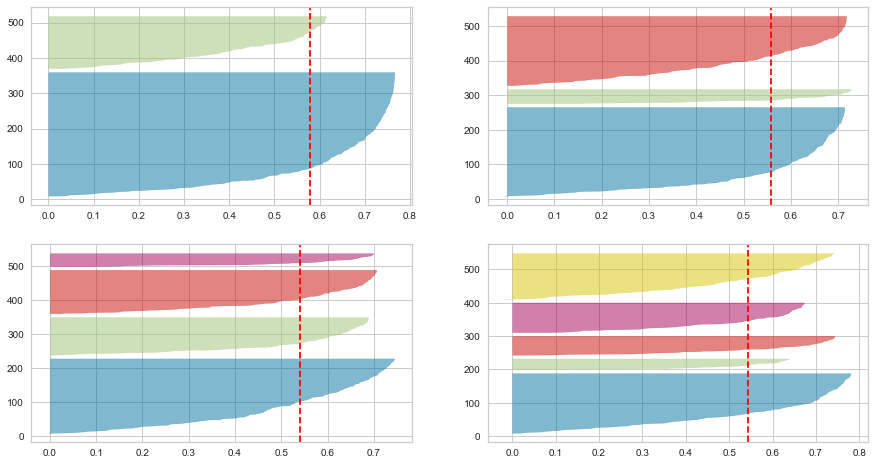

In [86]:
from sklearn.metrics import silhouette_score
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2,3,4,5]:
    km_iris = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(k, 2)
    cluster_labels = km_iris.fit_predict(X)
    visualizer = SilhouetteVisualizer(km_iris, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

<p>
    Jika dilihat darinilai silhoutte score, k=2 dan k=3 adalah paling tinggi, namun jika diamati gambar silhoutte, k=4 menunjukkan klaster lebih homogen, bisa dilihat dari thickness/ ketebalan silhoutte yang hampir sama antara satu dengan yang lain.